In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_absolute_error
import joblib
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df=pd.read_excel('cardekho_scr.xlsx')
df

,Unnamed: 0,year and brand,model,fuel,variant,kms,Price
0,0,2016 Maruti Baleno,1.2 CVT Delta,Petrol,Automatic,"25,735 kms",5.74 Lakh
1,1,2015 Hyundai Grand i10,Sportz,Petrol,Manual,"18,174 kms",4.5 Lakh
2,2,2014 Hyundai i10,Sportz 1.1L,Petrol,Manual,"45,195 kms",3.31 Lakh
3,3,2017 Maruti Alto K10,VXI Optional,Petrol,Manual,"22,761 kms",3.34 Lakh
4,4,2015 Hyundai Grand i10,Asta Option,Petrol,Manual,"22,819 kms",4.25 Lakh
...,...,...,...,...,...,...,...
5665,5665,2012 Maruti Eeco,5 Seater AC BSIV,Petrol,Manual,"30,000 kms",2.25 Lakh
5666,5666,2018 Ford Figo,1.2P Titanium MT,Petrol,Manual,"27,003 kms",4.9 Lakh
5667,5667,2019 Hyundai Creta,1.6 SX Option,Petrol,Manual,"19,000 kms",13 Lakh
5668,5668,2018 Maruti Ignis,Alpha,Petrol,Manual,"14,002 kms",4.75 Lakh


# With the covid 19 impact in the market, we have seen lot of changes in the car market. 
# Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model.

# year & brand name = shows us the details of the model year and its brand name.

# Model = model name of the car.

# Fuel = fuel used by the car engine.

# Variant = variant of the car whether its automatic or manual.

# Kms = shows us the details of how much km the car has covered.

# Price = price of the car.


In [3]:
df.dtypes

Unnamed: 0         int64
year and brand    object
model             object
fuel              object
variant           object
kms               object
Price             object
dtype: object

# we can see that all the data is in object type data which we need to convert into numeric format to build evaluation models

# DATA CLEANING

In [4]:
#spliting the year and brand name into two different columns
df1 = df["year and brand"].str.split(" ", n = 1, expand = True)
df1

,0,1
0,2016,Maruti Baleno
1,2015,Hyundai Grand i10
2,2014,Hyundai i10
3,2017,Maruti Alto K10
4,2015,Hyundai Grand i10
...,...,...
5665,2012,Maruti Eeco
5666,2018,Ford Figo
5667,2019,Hyundai Creta
5668,2018,Maruti Ignis


In [5]:
#assinging the values 
df['year']=df1[0]
df['brand']=df1[1]

In [6]:
#we removed the word lakhs in price column as it is our output column
df['Price'] = df['Price'].map(lambda x: x.lstrip('+-').rstrip('Lakh,,'))
df

,Unnamed: 0,year and brand,model,fuel,variant,kms,Price,year,brand
0,0,2016 Maruti Baleno,1.2 CVT Delta,Petrol,Automatic,"25,735 kms",5.74,2016,Maruti Baleno
1,1,2015 Hyundai Grand i10,Sportz,Petrol,Manual,"18,174 kms",4.5,2015,Hyundai Grand i10
2,2,2014 Hyundai i10,Sportz 1.1L,Petrol,Manual,"45,195 kms",3.31,2014,Hyundai i10
3,3,2017 Maruti Alto K10,VXI Optional,Petrol,Manual,"22,761 kms",3.34,2017,Maruti Alto K10
4,4,2015 Hyundai Grand i10,Asta Option,Petrol,Manual,"22,819 kms",4.25,2015,Hyundai Grand i10
...,...,...,...,...,...,...,...,...,...
5665,5665,2012 Maruti Eeco,5 Seater AC BSIV,Petrol,Manual,"30,000 kms",2.25,2012,Maruti Eeco
5666,5666,2018 Ford Figo,1.2P Titanium MT,Petrol,Manual,"27,003 kms",4.9,2018,Ford Figo
5667,5667,2019 Hyundai Creta,1.6 SX Option,Petrol,Manual,"19,000 kms",13,2019,Hyundai Creta
5668,5668,2018 Maruti Ignis,Alpha,Petrol,Manual,"14,002 kms",4.75,2018,Maruti Ignis


In [7]:
#convering the price column into numeric and then to float
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

In [8]:
df['Price']=df['Price'].astype('float64')

In [9]:
df['Price']

0        5.74
1        4.50
2        3.31
3        3.34
4        4.25
        ...  
5665     2.25
5666     4.90
5667    13.00
5668     4.75
5669    16.50
Name: Price, Length: 5670, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5670 non-null   int64  
 1   year and brand  5670 non-null   object 
 2   model           5670 non-null   object 
 3   fuel            5670 non-null   object 
 4   variant         5670 non-null   object 
 5   kms             5670 non-null   object 
 6   Price           5641 non-null   float64
 7   year            5670 non-null   object 
 8   brand           5670 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 398.8+ KB


In [11]:
df['kms'] = df['kms'].map(lambda x: x.lstrip('+-').rstrip('kms'))

In [12]:
for i in range(len(df.kms.values)):
    df['kms'].iloc[i]=df.kms.values[i].split()[0]
    if ''.join(df.kms.values[i].split(',')).isdigit():
        df['kms'].iloc[i]=int(''.join(df.kms.values[i].split(',')))

In [13]:
df['kms']=df['kms'].astype('int')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5670 entries, 0 to 5669
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5670 non-null   int64  
 1   year and brand  5670 non-null   object 
 2   model           5670 non-null   object 
 3   fuel            5670 non-null   object 
 4   variant         5670 non-null   object 
 5   kms             5670 non-null   int32  
 6   Price           5641 non-null   float64
 7   year            5670 non-null   object 
 8   brand           5670 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(6)
memory usage: 376.6+ KB


In [15]:
df.isnull().sum()

Unnamed: 0         0
year and brand     0
model              0
fuel               0
variant            0
kms                0
Price             29
year               0
brand              0
dtype: int64

# we can see that there are some null values present in the price column so we will be removing the null values

In [16]:
#dropping the null values
df.dropna(inplace=True)

In [17]:
df

,Unnamed: 0,year and brand,model,fuel,variant,kms,Price,year,brand
0,0,2016 Maruti Baleno,1.2 CVT Delta,Petrol,Automatic,25735,5.74,2016,Maruti Baleno
1,1,2015 Hyundai Grand i10,Sportz,Petrol,Manual,18174,4.50,2015,Hyundai Grand i10
2,2,2014 Hyundai i10,Sportz 1.1L,Petrol,Manual,45195,3.31,2014,Hyundai i10
3,3,2017 Maruti Alto K10,VXI Optional,Petrol,Manual,22761,3.34,2017,Maruti Alto K10
4,4,2015 Hyundai Grand i10,Asta Option,Petrol,Manual,22819,4.25,2015,Hyundai Grand i10
...,...,...,...,...,...,...,...,...,...
5665,5665,2012 Maruti Eeco,5 Seater AC BSIV,Petrol,Manual,30000,2.25,2012,Maruti Eeco
5666,5666,2018 Ford Figo,1.2P Titanium MT,Petrol,Manual,27003,4.90,2018,Ford Figo
5667,5667,2019 Hyundai Creta,1.6 SX Option,Petrol,Manual,19000,13.00,2019,Hyundai Creta
5668,5668,2018 Maruti Ignis,Alpha,Petrol,Manual,14002,4.75,2018,Maruti Ignis


# we will drop the columns unnamed and year and brand 

# unnamed is nothing but a serial number to the entry 

# we already split the year and brand into two differnt columns

In [18]:
df=df.drop(['year and brand','Unnamed: 0'],axis=1)
df

,model,fuel,variant,kms,Price,year,brand
0,1.2 CVT Delta,Petrol,Automatic,25735,5.74,2016,Maruti Baleno
1,Sportz,Petrol,Manual,18174,4.50,2015,Hyundai Grand i10
2,Sportz 1.1L,Petrol,Manual,45195,3.31,2014,Hyundai i10
3,VXI Optional,Petrol,Manual,22761,3.34,2017,Maruti Alto K10
4,Asta Option,Petrol,Manual,22819,4.25,2015,Hyundai Grand i10
...,...,...,...,...,...,...,...
5665,5 Seater AC BSIV,Petrol,Manual,30000,2.25,2012,Maruti Eeco
5666,1.2P Titanium MT,Petrol,Manual,27003,4.90,2018,Ford Figo
5667,1.6 SX Option,Petrol,Manual,19000,13.00,2019,Hyundai Creta
5668,Alpha,Petrol,Manual,14002,4.75,2018,Maruti Ignis


# EDA

In [19]:
df.columns

Index(['model', 'fuel', 'variant', 'kms', 'Price', 'year', 'brand'], dtype='object')

In [20]:
column=['fuel', 'variant','year']

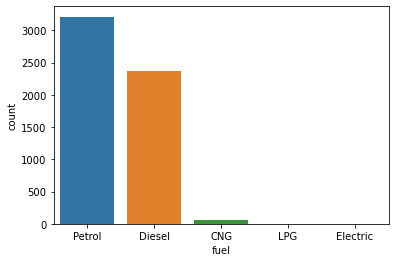

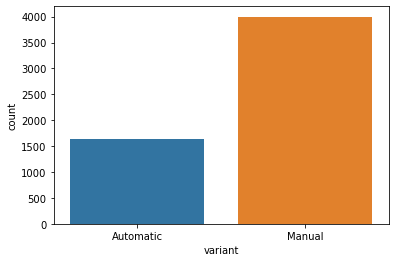

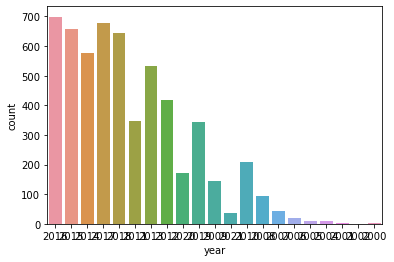

In [21]:
# object type data countplots
for i in column:
    sns.countplot(df[i])
    plt.show()

<AxesSubplot:xlabel='year', ylabel='count'>

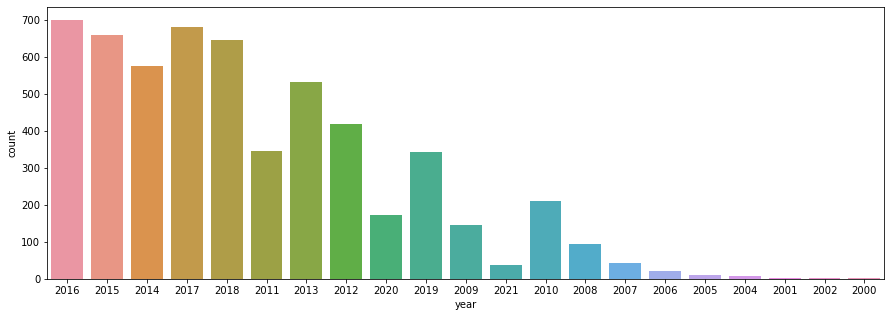

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(df['year'])

# observations:
    
# Most of the used cars are in petrol and then diesel. we can also see some of the cars with cng fuel, as the market is growing for electric vehicles we dont see a lot of electric cars being sold as used cars.

# manual cars are what cost low when it comes to used cars and it is more likely to be sold in used cars compared to automatic.

# most of the used cars for sale comes from the year 2016, 2017, 2018 


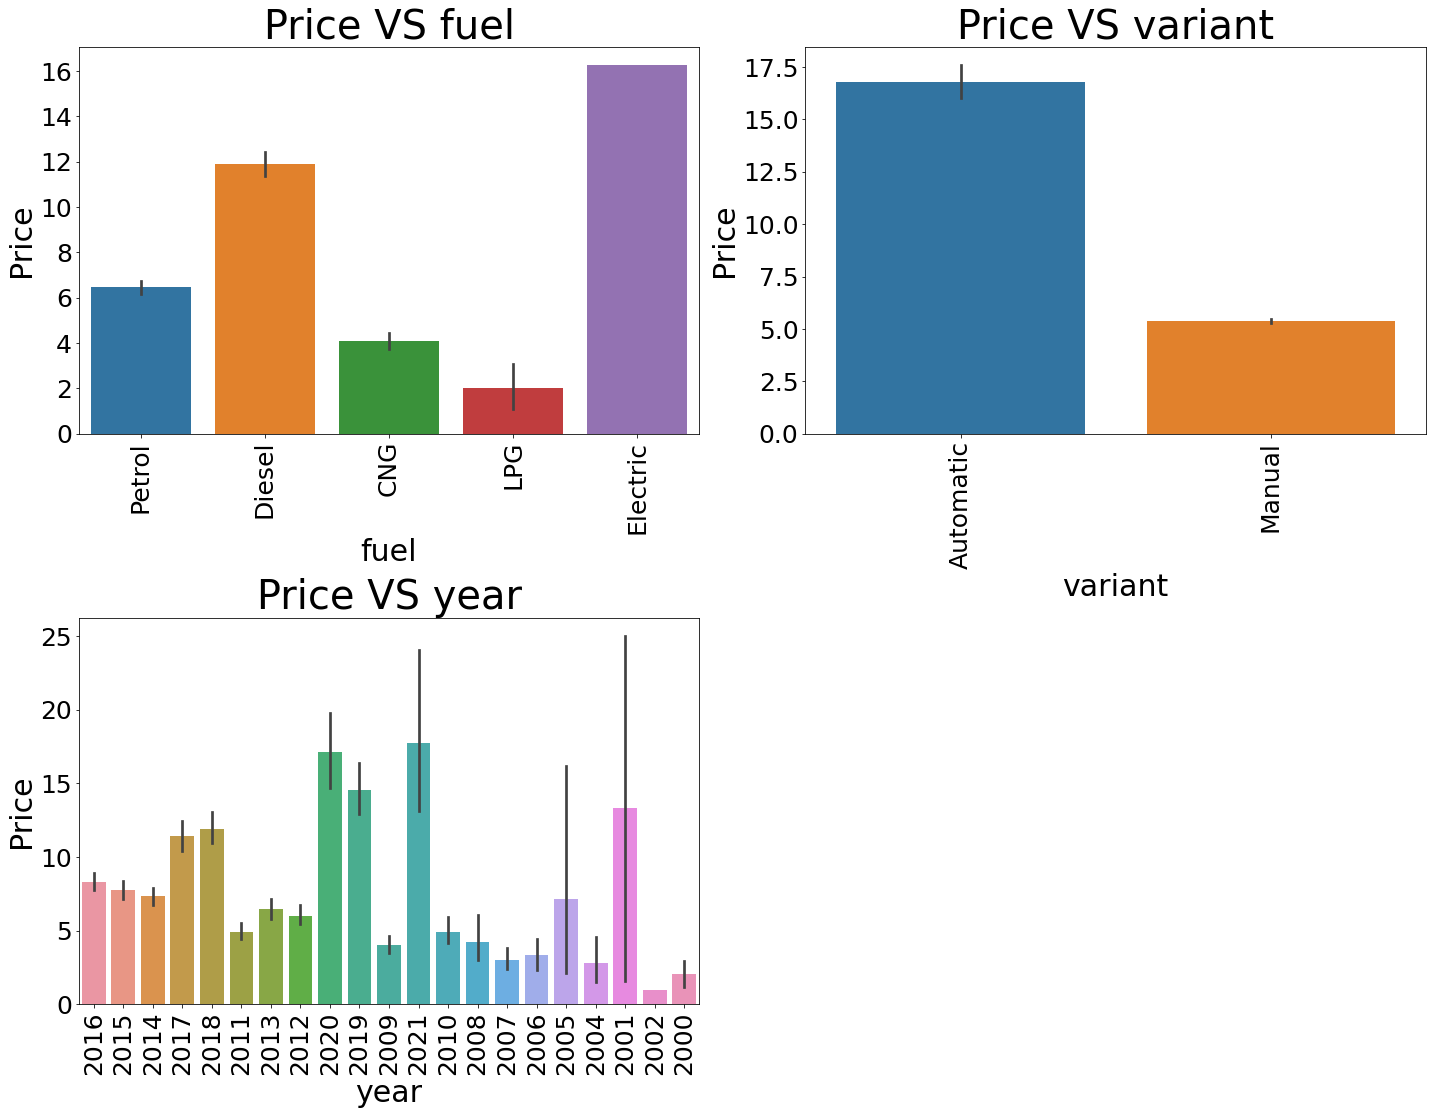

In [23]:
categorical_columns=['fuel', 'variant', 'year']
plt.figure(figsize=(20,30))
for i in range(len(categorical_columns)):
    plt.subplot(4,2,i+1)
    sns.barplot(y=df['Price'],x=df[categorical_columns[i]])
    plt.title(f"Price VS {categorical_columns[i]}",fontsize=40)
    plt.xticks(rotation=90,fontsize=25)  
    plt.yticks(rotation=0,fontsize=25)
    plt.xlabel(categorical_columns[i],fontsize = 30)
    plt.ylabel('Price',fontsize = 30)
    plt.tight_layout()

# observation from the above graphs:

# Whhat we saw from price vs fuel graph is that lpg used cars have the lowest price compared to all other cars as there are very less lpg pumps and demand for them is less
# Price for diesel engine cars is more as diesel is less expensive than petrol and widely avialable 
# Price for petrol cars is moderate
# Price for electric cars is the highest as they are newly introduced in the market and it cost very less compared to other fuels.

# Price for automatic cars is more compared to manual cars as automatic cars provide ease in driving and have high demand compared to manual cars.

# When we checked price vs year graph we found that cars are expensive if the model year is from 2015-2021
# Older the car, less is the price of the car an vica-versa.


# Label encoder to convert the categorical data into numeric form.

In [24]:
df['year']=df['year'].astype('int64')

In [25]:
from sklearn.preprocessing import LabelEncoder
lis=['fuel','variant','model','brand']
le=LabelEncoder()
for i in lis:
    df[i]=le.fit_transform(df[i])

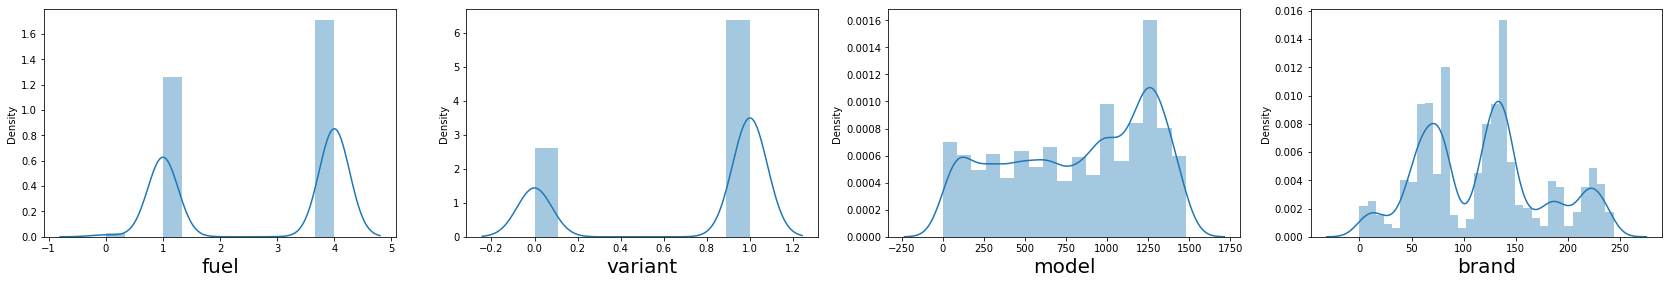

In [26]:
plt.figure(figsize=(29,200))
plotnumber=1
for column in lis:
    if plotnumber<=len(lis):
        ax=plt.subplot(40,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# we can see biomodal distribution in the graphs

model        AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
fuel       AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
variant    AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
kms        AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
Price      AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
year       AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
brand      AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
dtype: object

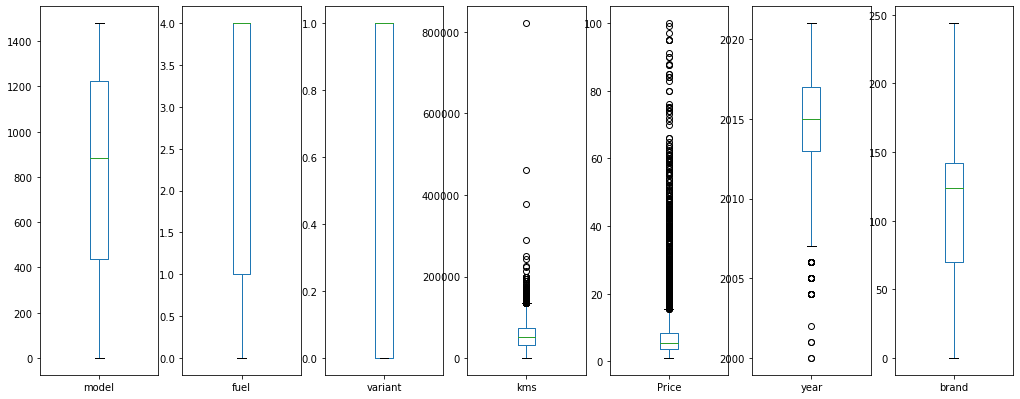

In [27]:
df.plot(kind='box',subplots=True,layout=(10,8),figsize=(20,80))


# we can see that there are some outliers present in  the year column and kms column so we will use zscore method to remove the outliers.


In [28]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z<3))

(array([   0,    0,    0, ..., 5640, 5640, 5640], dtype=int64), array([0, 1, 2, ..., 4, 5, 6], dtype=int64))


In [29]:
df1=df[(z<3).all(axis=1)]
df1

,model,fuel,variant,kms,Price,year,brand
0,54,4,0,25735,5.74,2016,124
1,1152,4,1,18174,4.50,2015,70
2,1153,4,1,45195,3.31,2014,80
3,1296,4,1,22761,3.34,2017,123
4,681,4,1,22819,4.25,2015,70
...,...,...,...,...,...,...,...
5665,584,4,1,30000,2.25,2012,130
5666,128,4,1,27003,4.90,2018,49
5667,311,4,1,19000,13.00,2019,66
5668,656,4,1,14002,4.75,2018,132


In [31]:
data_loss=(5641-5421)/5641*100
data_loss

3.900017727353306

In [32]:
df1=df

<AxesSubplot:>

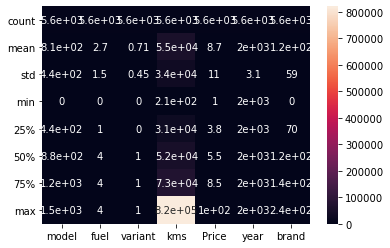

In [33]:
sns.heatmap(df.describe(),annot=True)

# checking correlation

<AxesSubplot:>

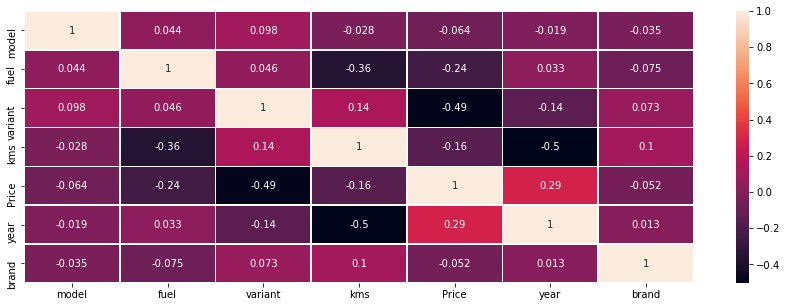

In [35]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

# observation:
 
# Brand and model columns are very less correlated to the price column.

# variant year and fuel are very highly correlated to the price column and variant being the highest compared to the other two.


# DATA preprocessing

In [36]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [37]:
x.columns

Index(['model', 'fuel', 'variant', 'kms', 'year', 'brand'], dtype='object')

In [38]:
x.skew()

model     -0.294367
fuel      -0.299027
variant   -0.919107
kms        3.264060
year      -0.530651
brand      0.272192
dtype: float64

# we can some skewness present in the data

In [39]:
#using power transform method to remove skewness.
from sklearn.preprocessing import power_transform
x[['model', 'fuel', 'variant', 'year', 'brand','kms']]=power_transform(x[['model', 'fuel', 'variant', 'year', 'brand','kms']],method='yeo-johnson')
x

,model,fuel,variant,kms,year,brand
0,-1.832044,0.866997,-1.559921,-0.887564,0.365395,0.178083
1,0.778853,0.866997,0.641058,-1.259981,0.033570,-0.763340
2,0.780961,0.866997,0.641058,-0.142430,-0.290780,-0.576404
3,1.079862,0.866997,0.641058,-1.025911,0.704861,0.161909
4,-0.247030,0.866997,0.641058,-1.023122,0.033570,-0.763340
...,...,...,...,...,...,...
5665,-0.468915,0.866997,0.641058,-0.703436,-0.917713,0.274349
5666,-1.610795,0.866997,0.641058,-0.831208,1.052142,-1.183700
5667,-1.125073,0.866997,0.641058,-1.215659,1.407414,-0.840242
5668,-0.303779,0.866997,0.641058,-1.502504,1.052142,0.306149


In [40]:
sc=StandardScaler()
x[['model', 'fuel', 'variant', 'year', 'brand','kms']]=sc.fit_transform(x[['model', 'fuel', 'variant', 'year', 'brand','kms']])

In [41]:
x

,model,fuel,variant,kms,year,brand
0,-1.832044,0.866997,-1.559921,-0.887564,0.365395,0.178083
1,0.778853,0.866997,0.641058,-1.259981,0.033570,-0.763340
2,0.780961,0.866997,0.641058,-0.142430,-0.290780,-0.576404
3,1.079862,0.866997,0.641058,-1.025911,0.704861,0.161909
4,-0.247030,0.866997,0.641058,-1.023122,0.033570,-0.763340
...,...,...,...,...,...,...
5665,-0.468915,0.866997,0.641058,-0.703436,-0.917713,0.274349
5666,-1.610795,0.866997,0.641058,-0.831208,1.052142,-1.183700
5667,-1.125073,0.866997,0.641058,-1.215659,1.407414,-0.840242
5668,-0.303779,0.866997,0.641058,-1.502504,1.052142,0.306149


# Model Building

In [42]:
#making a list of the regression models which are to be tested with the data set
models=[GradientBoostingRegressor(),LinearRegression(),Ridge(),BayesianRidge(),SGDRegressor(),SVR(),
        AdaBoostRegressor(),KNeighborsRegressor(),RandomForestRegressor(),BaggingRegressor(),
       DecisionTreeRegressor(),ExtraTreesRegressor()]

In [43]:
#making a for loop to check the models and their mean cross_val score with scoring set to r2
for i in models:
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=82,test_size=0.20)
    score=cross_val_score(i,xtrain,ytrain,cv=5,scoring='r2').mean()
    i.fit(xtrain,ytrain)
    ypred=i.predict(xtest)
    if r2_score(ytest,ypred)>score:
        diff=r2_score(ytest,ypred)-score
    else:
        diff=score-r2_score(ytest,ypred)
    print(i)
    print('mean cross_val_score',score)
    print('r2',r2_score(ytest,ypred))
    print('diff',diff)
    print('mean_abs_error',mean_absolute_error(ytest, ypred))
    print('\n')

GradientBoostingRegressor()
mean cross_val_score 0.7385005668156837
r2 0.8340202049000551
diff 0.09551963808437147
mean_abs_error 2.1434755729806376


LinearRegression()
mean cross_val_score 0.3407474070410016
r2 0.41737142351620193
diff 0.07662401647520034
mean_abs_error 4.380030928841576


Ridge()
mean cross_val_score 0.34075166383788824
r2 0.4173852520065292
diff 0.07663358816864096
mean_abs_error 4.379549729935338


BayesianRidge()
mean cross_val_score 0.3408016133900258
r2 0.41755063863873054
diff 0.07674902524870475
mean_abs_error 4.3736895528676785


SGDRegressor()
mean cross_val_score 0.3399969857733769
r2 0.41285026724729623
diff 0.07285328147391934
mean_abs_error 4.4375083621988605


SVR()
mean cross_val_score 0.40985021219438833
r2 0.5491764020773742
diff 0.13932618988298584
mean_abs_error 2.6575853821110718


AdaBoostRegressor()
mean cross_val_score 0.35289950915269924
r2 0.2538216966403455
diff 0.09907781251235376
mean_abs_error 4.6847704326058235


KNeighborsRegressor()
m

# from the above results what we found is that our best performing models:
    
# Bagging regressor is providing us with the accuracy of 88% and least cross val difference.

# random forest is giving us the accuracy of 90%  with less cross val difference 

# extratrees is giving us the accuracy of 88% 

# HyperTuning the best models

Extratrees regressor

In [ ]:
parameter = {'n_estimators':[10,100,1000],'criterion':['squared_error','mse','absolute_error','mae']}
clf = GridSearchCV(ExtraTreesRegressor(), parameter,scoring="r2")
clf.fit(x,y)
clf.best_params_

TESTING ON THE WHOLE DATASET

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=82,test_size=0.20,shuffle=True)
etr=ExtraTreesRegressor(n_estimators=100,criterion='mae')
etr.fit(x,y)
ypred=etr.predict(x)
score=r2_score(y,ypred)
print('r2_score :',score)

r2_score : 0.99996876777956


TRAIN DATA

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=82,test_size=0.20,shuffle=True)
etr=ExtraTreesRegressor(n_estimators=100,criterion='mae')
etr.fit(xtrain,ytrain)
ypred=etr.predict(xtest)
score=r2_score(ytest,ypred)
print('r2_score :',score)
print('mean_abs_error',mean_absolute_error(ytest, ypred))

r2_score : 0.8800795424141833
mean_abs_error 1.4408300708591677


Random forest Regressor

In [47]:
parameters={"n_estimators":[10,50,100],'criterion':['mse', 'mae']}
clf = GridSearchCV(RandomForestRegressor(), parameters,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'criterion': 'mse', 'n_estimators': 100}

TESTING ON THE WHOLE DATA

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=82,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=100,criterion='mse',max_features='log2')
rfr.fit(x,y)
y_pred=rfr.predict(x)
score=r2_score(y,y_pred)
print('r2_score :',score)

r2_score : 0.9753566917022906


TRAINED DATA

In [49]:
xtrain,xtest,ytrain,ytest=train_test_split(x, y,random_state=82,test_size=0.20,shuffle=True)
rfr=RandomForestRegressor(n_estimators=50,criterion='mse',max_features='log2')
rfr.fit(xtrain,ytrain)
ypred=rfr.predict(xtest)
score=r2_score(ytest,ypred)
print('r2_score :',score)
print('mean_abs_error',mean_absolute_error(ytest, ypred))

r2_score : 0.8989235526786412
mean_abs_error 1.4317355476823146


Bagging regressor

In [50]:
parameters={'n_estimators':[10,500],'max_features':[0.001,0.01,0.1,1.0]}
clf=GridSearchCV(BaggingRegressor(),parameters,cv=5,scoring='r2')
clf.fit(x,y)
clf.best_params_

{'max_features': 1.0, 'n_estimators': 500}

TESTING ON THE WHOLE DATASET

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 82,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x,y)
y_pred=br.predict(x)
score=r2_score(y,y_pred)
print('r2_score :',score)

r2_score : 0.9770148169870794


TRAINED DATA

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 82,test_size=0.20,shuffle=True)
br=BaggingRegressor(n_estimators=500,max_features=1.0)
br.fit(x_train,y_train)
y_pred=br.predict(x_test)
score=r2_score(y_test,y_pred)
print('r2_score :',score)
print('mean_abs_error',mean_absolute_error(ytest, ypred))

r2_score : 0.9029453720563589
mean_abs_error 1.4317355476823146


# After hypertuning bagging regressor gave us the accuracy of 90% 

In [60]:
x['pred']=br.predict(x)
pred=br.predict(x)

In [61]:
x['pred']

0        6.01482
1        4.45982
2        3.82932
3        3.37466
4        4.93290
          ...   
5665     2.44654
5666     5.28998
5667    12.30032
5668     5.14756
5669    21.24706
Name: pred, Length: 5641, dtype: float64

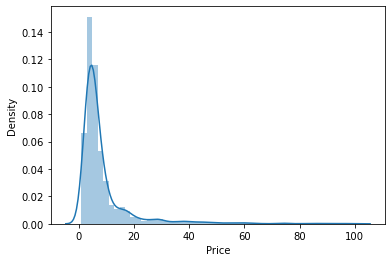

<AxesSubplot:ylabel='Density'>

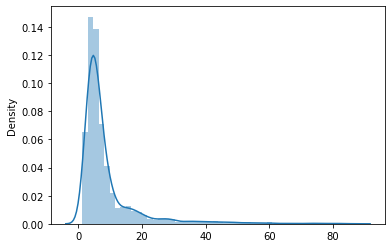

In [62]:
sns.distplot(y)
plt.show()
sns.distplot(pred)

# we can see that the predicted data is very close to actual data

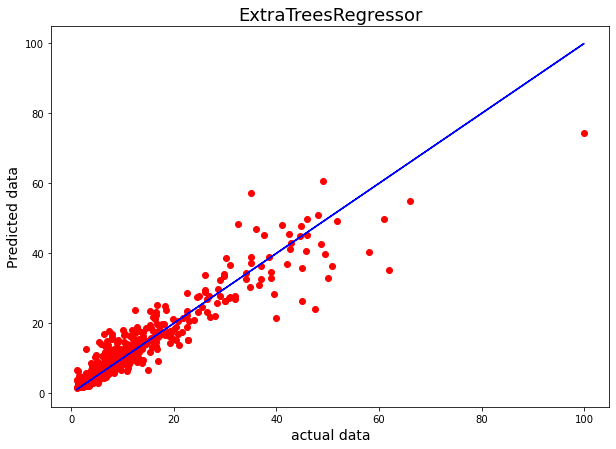

In [63]:
plt.figure(figsize=(10,7))
plt.scatter(x=ytest, y=ypred, color='r')
plt.plot(y_test,y_test, color='b')
plt.xlabel('actual data',fontsize=14)
plt.ylabel('Predicted data',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=18)
plt.show()

# predicting the values for the test data using our best model

# Saving the best model

In [64]:
#saving the bagging regressor as our best model
joblib.dump(br,'car_predict')

['car_predict']